In [147]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
import seaborn as sns
import platform
from matplotlib import font_manager , rc

if platform.system() == 'Darwin':
  rc('font' , family = 'AppleGothic')
elif platform.system() == 'Windows':
  path = 'C:/Windows/Fonts/malgun.ttf'
  font_name = font_manager.FontProperties(fname = path).get_name()
  rc('font' , family = font_name)
else:
  print('모름')
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score , precision_score , recall_score , roc_auc_score , f1_score , confusion_matrix , roc_curve , precision_recall_curve

# 문제 정의
- 로지스틱회귀(Logistic Regression)를 이용한 타이타닉 생존자 예측
- 목표 : 타이타닉 승객 데이터셋을 이용하여 생존 여부 예측

In [148]:
titanic = pd.read_csv('titanic.csv')
titanic

,Unnamed: 0,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0
...,...,...,...,...,...,...,...,...,...,...
884,884,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,S,0
885,885,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,S,1
886,886,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,S,0
887,887,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,C,1


In [149]:
titanic.columns

Index(['Unnamed: 0', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Embarked', 'Survived'],
      dtype='object')

In [150]:
data = titanic[['Pclass', 'Age', 'SibSp', 'Parch']].to_numpy()
target = titanic.iloc[:,-1].to_numpy()

In [151]:
titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']].describe()

,Pclass,Age,SibSp,Parch
count,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452
std,0.834700,12.984932,1.103705,0.806761
min,1.000000,0.420000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000
max,3.000000,80.000000,8.000000,6.000000


In [152]:
titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']].corr()

,Pclass,Age,SibSp,Parch
Pclass,1.000000,-0.336512,0.081656,0.016824
Age,-0.336512,1.000000,-0.232543,-0.171485
SibSp,0.081656,-0.232543,1.000000,0.414542
Parch,0.016824,-0.171485,0.414542,1.000000


In [153]:
titanic.iloc[:,-1].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [154]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
kn = KNeighborsClassifier()
lr = LogisticRegression()
dt = DecisionTreeClassifier()

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
train_input , test_input , train_target , test_target = train_test_split(data , target , stratify = target , test_size = 0.3)

In [157]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators = [('Kn' , kn),('lr' , lr),('dt' , dt)] ,voting = 'soft')
vc.fit(train_input , train_target)


VotingClassifier(estimators=[('Kn', KNeighborsClassifier()),
                             ('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier())],
                 voting='soft')

- 죽었다고 예측했을 때 살아있는 것이 큰 오점이므로 , 정밀도를 예측해보자

In [158]:
pred = vc.predict(test_input)

In [159]:
precision = precision_score(test_target , pred)
accuracy = accuracy_score(test_target , pred)

In [160]:
print('보팅 분류기의 정밀도 : ' , precision)

보팅 분류기의 정밀도 :  0.5959595959595959


In [169]:
model = [kn , lr , dt]
name = [vc.__class__.__name__]
pre = [precision]
acc = [accuracy]
print('보팅 분류기의 정밀도 : ' , precision , ' 보팅 분류기의 정확도 : ' , accuracy)
for i in model:
    i.fit(train_input , train_target)
    pred1 = i.predict(test_input)
    precision1 = precision_score(test_target , pred1)
    model_name = i.__class__.__name__
    accuracy1 = accuracy_score(test_target , pred1)
    name.append(model_name)
    pre.append(precision1)
    acc.append(accuracy1)
    print(f'{model_name}의 정밀도 : {precision1} , 정확도 : {accuracy1}')

보팅 분류기의 정밀도 :  0.5959595959595959  보팅 분류기의 정확도 :  0.6891385767790262
KNeighborsClassifier의 정밀도 : 0.5876288659793815 , 정확도 : 0.6816479400749064
LogisticRegression의 정밀도 : 0.5882352941176471 , 정확도 : 0.6629213483146067
DecisionTreeClassifier의 정밀도 : 0.6153846153846154 , 정확도 : 0.6853932584269663


- 모든 분류기가 대체로 정확도가 낮다.

Text(0.5, 1.0, '분류기별 정밀도')

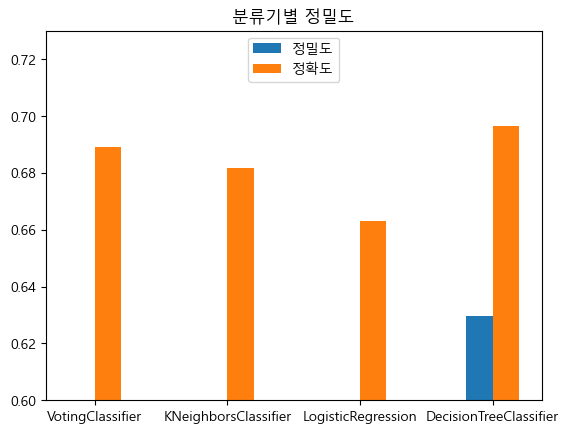

In [162]:
bar_width = 0.2
plt.bar(x = np.arange(4) - bar_width/2 , width = 0.2 ,  height = pre , label = '정밀도')
plt.bar(x = np.arange(4) + bar_width/2 , width = 0.2 , height = acc , label = '정확도')
plt.ylim(0.6 , 0.73)
plt.xticks(np.arange(4) , name)
plt.legend(loc = 'upper center')

plt.title('분류기별 정밀도')

- 정밀도가 높다 = 죽었다고 예측했는데 살아있는 경우가 적다 => 손실을 최소화할 수 있는 방법?

In [163]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42 , n_jobs = -1)
scores = cross_validate(rf , train_input , train_target , n_jobs = -1 , return_train_score = True)


In [164]:
rf.fit(train_input , train_target)
print(rf.feature_importances_)

[0.21246974 0.60799474 0.10344066 0.07609486]


In [165]:
rf.score(train_input , train_target)

0.8553054662379421

In [166]:
rf.score(test_input , test_target)

0.6779026217228464

In [167]:
vc.score(train_input , train_target)

0.842443729903537

In [168]:
vc.score(test_input , test_target)

0.6891385767790262